In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.metrics import roc_auc_score
from Vis import plot_loss, plot_roc
from Preprocessing import Preprocessing
from Preprocessing import Cols
import numpy as np
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler
from pandas import DataFrame
from pandas import Series
import pandas as pd
# pandas.set_option('max_columns',10)

Using TensorFlow backend.


In [2]:
pre = Preprocessing()
X, y = pre.load_data(time_gap=300)

prepared dataset contains: per_stud_dataset + per_action_dataset_summ


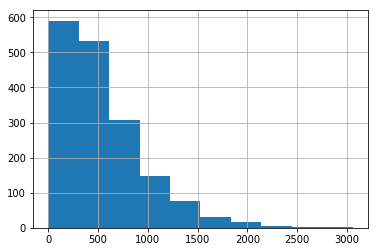

In [3]:
# number of actions for each student before summarization
pre.raw_dataset.groupby("ITEST_id").size().hist()

In [4]:
# having a sense about input dataset
print("shape of X: {0}".format(X.shape))
print("shape of y: {0}".format(y.shape))
print("X:")
X[X.index.get_level_values(0) ==9]

shape of X: (4362, 193)
shape of y: (4362, 1)
X:


AveKnow  MCAS  SchoolId  NumActions  AveCarelessness  \
ITEST_id seq_ix                                                          
9        0       0.185138    32         2         504         0.099734   
         1       0.185138    32         2         504         0.099734   
         2       0.185138    32         2         504         0.099734   
         3       0.185138    32         2         504         0.099734   
         4       0.185138    32         2         504         0.099734   
         5       0.185138    32         2         504         0.099734   
         6       0.185138    32         2         504         0.099734   

                 min_totalTimeByPercentCorrectForskill  \
ITEST_id seq_ix                                          
9        0                                         0.0   
         1                                         0.0   
         2                                         0.0   
         3                                         0.0   
         4                                         4.0   
         5                                         0.0   
         6                                         0.0   

                 min_frPast5HelpRequest  min_responseIsFillIn  min_bottomHint  \
ITEST_id seq_ix                                                                 
9        0                            0                     0               0   
         1                            0                     0               0   
         2                            0                     0               0   
         3                            0                     0               0   
         4                            0                     0               0   
         5                            0                     0               0   
         6                            0                     0               0   

                 min_original      ...        sum_endsWithAutoScaffolding  \
ITEST_id seq_ix                    ...                                      
9        0                  0      ...                                  0   
         1                  0      ...                                  0   
         2                  0      ...                                  0   
         3                  0      ...                                  0   
         4                  0      ...                                  0   
         5                  0      ...                                  0   
         6                  0      ...                                  0   

                 sum_hintTotal  sum_timeOver80  sum_totalFrPercentPastWrong  \
ITEST_id seq_ix                                                               
9        0                 110              11                     0.000000   
         1                 108              14                    14.116667   
         2                  78              11                    23.820407   
         3                  70              10                    23.091270   
         4                  69               8                    10.407749   
         5                  15               7                    26.538917   
         6                  75               9                    21.407180   

                 sum_totalFrSkillOpportunities  sum_hintCount  \
ITEST_id seq_ix                                                 
9        0                                 131             64   
         1                                 287             72   
         2                                 413             56   
         3                                 209             50   
         4                                 325             33   
         5                                 529             10   
         6                                 762             50   

                 sum_frPast5WrongCount  sum_RES_GAMING  \
ITEST_id seq_ix                                 

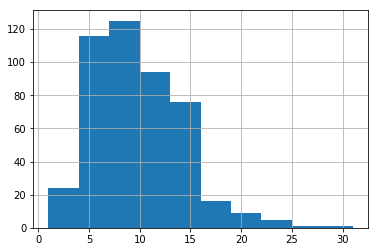

In [5]:
# number of actions for each student **after** summarization
X.groupby("ITEST_id").size().hist()

In [6]:
# scaling dataset
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled[X_scaled.index.get_level_values(0) ==9]

AveKnow      MCAS  SchoolId  NumActions  AveCarelessness  \
ITEST_id seq_ix                                                              
9        0      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         1      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         2      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         3      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         4      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         5      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         6      -0.107453  0.115385       0.0   -0.126506        -0.143416   

                 min_totalTimeByPercentCorrectForskill  \
ITEST_id seq_ix                                          
9        0                                         0.0   
         1                                         0.0   
         2                                         0.0   
         3                                         0.0   
         4                                         4.0   
         5                                         0.0   
         6                                         0.0   

                 min_frPast5HelpRequest  min_responseIsFillIn  min_bottomHint  \
ITEST_id seq_ix                                                                 
9        0                          0.0                   0.0             0.0   
         1                          0.0                   0.0             0.0   
         2                          0.0                   0.0             0.0   
         3                          0.0                   0.0             0.0   
         4                          0.0                   0.0             0.0   
         5                          0.0                   0.0             0.0   
         6                          0.0                   0.0             0.0   

                 min_original      ...        sum_endsWithAutoScaffolding  \
ITEST_id seq_ix                    ...                                      
9        0                0.0      ...                                0.0   
         1                0.0      ...                                0.0   
         2                0.0      ...                                0.0   
         3                0.0      ...                                0.0   
         4                0.0      ...                                0.0   
         5                0.0      ...                                0.0   
         6                0.0      ...                                0.0   

                 sum_hintTotal  sum_timeOver80  sum_totalFrPercentPastWrong  \
ITEST_id seq_ix                                                               
9        0            0.633929             1.2                    -0.665782   
         1            0.616071             1.8                     0.372671   
         2            0.348214             1.2                     1.086500   
         3            0.276786             1.0                     1.032863   
         4            0.267857             0.6                     0.099835   
         5           -0.214286             0.4                     1.286479   
         6            0.321429             0.8                     0.908977   

                 sum_totalFrSkillOpportunities  sum_hintCount  \
ITEST_id seq_ix                                                 
9        0                           -0.213830       0.579710   
         1                            0.092202       0.695652   
         2                            0.339382       0.463768   
         3                           -0.060814       0.376812   
         4                            0.166748       0.130435   
         5                            0.566945      -0.202899   
         6                            1.024031       0.376812   

                 sum_frPast5WrongCount  sum_RES_GAMING  \
ITEST_id seq

In [7]:
# defining sequence length (or number of time-steps) for each student and batch-size
# NOTE that in Keras by default network is updated after each batch and the hidden state is reset after each epoch
batch_size=1
max_length_seq = 10

In [8]:
# padding sequences to have a same length
X_padded = []
for stud_id, stud_seq in X_scaled.groupby(by='ITEST_id'):
    X_padded.append(stud_seq)
X_padded = sequence.pad_sequences(X_padded, max_length_seq, dtype='float64')

In [9]:
# getting a sense about padded dataset
new_seq_ix = pd.Index(list(range(0,max_length_seq))* X_padded.shape[0], name="seq_ix")
ITEST_ix = pd.Index(np.repeat(sorted(X.index.get_level_values(0).unique()), max_length_seq), name='ITEST_id')
DataFrame(X_padded.reshape(X_padded.shape[0]*X_padded.shape[1], -1), index=[ITEST_ix, new_seq_ix], columns=X.columns)

AveKnow      MCAS  SchoolId  NumActions  AveCarelessness  \
ITEST_id seq_ix                                                              
9        0       0.000000  0.000000       0.0    0.000000         0.000000   
         1       0.000000  0.000000       0.0    0.000000         0.000000   
         2       0.000000  0.000000       0.0    0.000000         0.000000   
         3      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         4      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         5      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         6      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         7      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         8      -0.107453  0.115385       0.0   -0.126506        -0.143416   
         9      -0.107453  0.115385       0.0   -0.126506        -0.143416   
27       0       0.000000  0.000000       0.0    0.000000         0.000000   
         1      -0.320630 -0.307692      -1.0   -0.879518        -0.453280   
         2      -0.320630 -0.307692      -1.0   -0.879518        -0.453280   
         3      -0.320630 -0.307692      -1.0   -0.879518        -0.453280   
         4      -0.320630 -0.307692      -1.0   -0.879518        -0.453280   
         5      -0.320630 -0.307692      -1.0   -0.879518        -0.453280   
         6      -0.320630 -0.307692      -1.0   -0.879518        -0.453280   
         7      -0.320630 -0.307692      -1.0   -0.879518        -0.453280   
         8      -0.320630 -0.307692      -1.0   -0.879518        -0.453280   
         9      -0.320630 -0.307692      -1.0   -0.879518        -0.453280   
33       0       0.000000  0.000000       0.0    0.000000         0.000000   
         1       0.000000  0.000000       0.0    0.000000         0.000000   
         2       0.000000  0.000000       0.0    0.000000         0.000000   
         3       0.000000  0.000000       0.0    0.000000         0.000000   
         4       1.250917  0.884615       0.0   -0.799197         0.905730   
         5       1.250917  0.884615       0.0   -0.799197         0.905730   
         6       1.250917  0.884615       0.0   -0.799197         0.905730   
         7       1.250917  0.884615       0.0   -0.799197         0.905730   
         8       1.250917  0.884615       0.0   -0.799197         0.905730   
         9       1.250917  0.884615       0.0   -0.799197         0.905730   
...                   ...       ...       ...         ...              ...   
7769     0       0.000000  0.000000       0.0    0.000000         0.000000   
         1       0.000000  0.000000       0.0    0.000000         0.000000   
         2       0.000000  0.000000       0.0    0.000000         0.000000   
         3       0.406774  0.615385       0.0   -0.640562         0.215826   
         4       0.406774  0.615385       0.0   -0.640562         0.215826   
         5       0.406774  0.615385       0.0   -0.640562         0.215826   
         6       0.406774  0.615385       0.0   -0.640562         0.215826   
         7       0.406774  0.615385       0.0   -0.640562         0.215826   
         8       0.406774  0.615385       0.0   -0.640562         0.215826   
         9       0.406774  0.615385       0.0   -0.640562         0.215826   
7775     0      -0.528356 -0.615385      -1.0    0.457831        -0.344665   
         1      -0.528356 -0.615385      -1.0    0.457831        -0.344665   
         2      -0.528356 -0.615385      -1.0    0.457831        -0.344665   
         3      -0.528356 -0.615385      -1.0    0.457831        -0.344665   
         4      -0.528356 -0.615385      -1.0    0.457831        -0.344665   
         5      -0.528356 -0.615385      -1.0    0.457831        -0.344665   
         6      -0.528356 -0.615385      -1.0    0.457831        -0.344665   
         7      -0.528356 -0.615385      -1.0    0.457831        -0.344665   
         8      -0.528356 -0.615385     

In [10]:
X_prepared = X_padded
y_prepared = y[~y.index.duplicated()].sort_index().values.flatten()

# splitting train/test data 
X_train, X_test, y_train,y_test = train_test_split(X_prepared,y_prepared, train_size=.80)

In [11]:
def create_LSTM_model(max_length_seq, feature_size):
    # create the LSTM network
    model = Sequential()
    model.add(LSTM(100, input_shape=(max_length_seq, feature_size)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
# Create model
model = create_LSTM_model(max_length_seq, X_train.shape[2])
history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

Train on 298 samples, validate on 75 samples
Epoch 1/20
298/298 [==============================] - 6s - loss: 0.6160 - acc: 0.7081 - val_loss: 0.6102 - val_acc: 0.7067
Epoch 2/20
298/298 [==============================] - 5s - loss: 0.4859 - acc: 0.7685 - val_loss: 0.6148 - val_acc: 0.7200
Epoch 3/20
298/298 [==============================] - 5s - loss: 0.3974 - acc: 0.8356 - val_loss: 0.5806 - val_acc: 0.6933
Epoch 4/20
298/298 [==============================] - 5s - loss: 0.3305 - acc: 0.8523 - val_loss: 0.6592 - val_acc: 0.6800
Epoch 5/20
298/298 [==============================] - 5s - loss: 0.2490 - acc: 0.8960 - val_loss: 0.6837 - val_acc: 0.7067
Epoch 6/20
298/298 [==============================] - 5s - loss: 0.2045 - acc: 0.9295 - val_loss: 0.7087 - val_acc: 0.6800
Epoch 7/20
298/298 [==============================] - 5s - loss: 0.1740 - acc: 0.9430 - val_loss: 0.7194 - val_acc: 0.7200
Epoch 8/20
298/298 [==============================] - 5s - loss: 0.1425 - acc: 0.9564 - val_lo

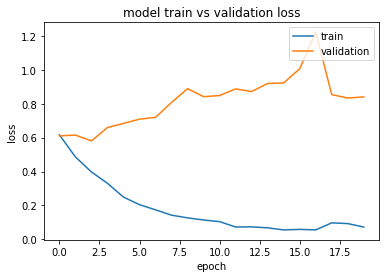

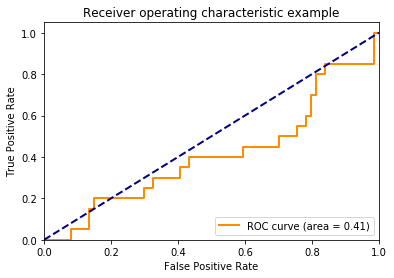

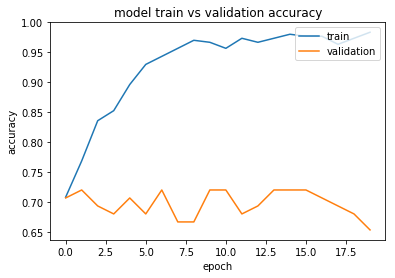

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               117600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 117,701
Trainable params: 117,701
Non-trainable params: 0
_________________________________________________________________
None
Test ROC Score: 0.409459
Test RMSE Score: 0.507996
Final Competition Score: 0.901463


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from Vis import plot_accuracy
# do prediction
y_pred = model.predict(X_test, batch_size=batch_size)

# calculating scores
roc_score = roc_auc_score(y_test, y_pred)
mse_score = mean_squared_error(y_test, y_pred)

# printing and plotting model and score information
plot_loss(history)
plot_roc(y_test, y_pred)
plot_accuracy(history)

print(model.summary())
print("Test ROC Score: %f" % roc_score)
print("Test RMSE Score: %f" % sqrt(mse_score))
print("Final Competition Score: %f" % (1 - sqrt(mse_score) + roc_score))